KNN classification
================

In [ ]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline



In [ ]:
import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_09_knn")


In [ ]:
#  df = pd.read_csv('Wine.txt', sep=';', encoding='cp1251')

df = pd.read_csv('Wine.txt', sep='\t')



In [ ]:
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
df.columns

Index(['Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6', 'Input7',
       'Input8', 'Input9', 'Input10', 'Input11', 'Input12', 'Input13',
       'Desired1(3)'],
      dtype='object')

In [ ]:
#  сбалансирована ли выборка?

df['Desired1(3)'].value_counts()

2    71
0    59
1    48
Name: Desired1(3), dtype: int64

In [ ]:
df.shape

(178, 14)

In [ ]:

#  разделяю предикоторы и отклики
X = df.iloc[:, :-1].values  
y = df.iloc[:, 13].values  


In [ ]:
#  проверяю себя
X[:11, :]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02],
       [1.420e+01, 1.760e+00, 2.450e+00, 1.520e+01, 1.120e+02, 3.270e+00,
        3.390e+00, 3.400e-01, 1.970e+00, 6.750e+00, 1.050e+00, 2.850e+00,
        1.45

In [ ]:
#  проверяю себя
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [ ]:
#  разделяю на обучающую и тестовую выборку
#  Зачем 0.33?

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 1234)  


In [ ]:
#  Стандартизация предикторов

from sklearn.preprocessing import StandardScaler   #   среднее 0, ст.отклонение 1
#  from sklearn.preprocessing import MinMaxScaler  #  к интервалу [0,1]

scaler = StandardScaler()   #   среднее 0, ст.отклонение 1
#  scaler = MinMaxScaler()  #   к интервалу [0,1] 

scaler.fit(X_train)

#  Важно: одинаковые параметры стандартизации 
#  у обучающего и тестового множества!

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)  



In [ ]:
#  Построение классификатора
#  Попробум вариант с 5 соседями (на самом деле число соседей надо определить заранее)
#  По умолчанию Евклидово расстояние
#  Как сменить расстояние ????

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_2, y_train)  


KNeighborsClassifier(n_neighbors=5, 
        algorithm='auto',   #  как искать ближайших соседей?
        leaf_size=30,       #  параметр  BallTree или KDTree
        metric='minkowski', #  расстояние между объектами
        p=2,                #  так расст. Минковского  превращается в евклидово
        metric_params=None, #  используем для самодельных расстояний
        n_jobs=1,           #  число процессов
        weights='uniform')   #  все наблюдения равноправны)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2)  


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
#  Определяем,насколько хороша модель

print(u'Обучающая выборка')
print(confusion_matrix(y_train, y_pred_train))  
print('Train sample accuracy', accuracy_score(y_train, y_pred_train, normalize=True))
print(classification_report(y_train, y_pred_train)) 

print(u'Тестовая выборка')
print(confusion_matrix(y_test, y_pred_test))  
print('Test sample accuracy', accuracy_score(y_test, y_pred_test, normalize=True))
print(classification_report(y_test, y_pred_test))  


Обучающая выборка
[[41  0  0]
 [ 0 31  0]
 [ 2  2 43]]
Train sample accuracy 0.9663865546218487
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       0.94      1.00      0.97        31
           2       1.00      0.91      0.96        47

    accuracy                           0.97       119
   macro avg       0.96      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119

Тестовая выборка
[[18  0  0]
 [ 0 16  1]
 [ 2  0 22]]
Test sample accuracy 0.9491525423728814
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.94      0.97        17
           2       0.96      0.92      0.94        24

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59



In [ ]:
#  Определяем оптимальное число ближайших соседей
#  Число ближайших соседей меняем от 1 до 40
#  Каждый раз считаем accuracy (долю правильных распознаваний)
#  На самом деле долю ошибок
#  При каком число ближайших соседей максимальное accuracy?

error_rate = [-9999]*40     #  изменяем append
for i in range(1, 41):  
    knn_res = KNeighborsClassifier(n_neighbors=i)
    knn_res.fit(X_train_2, y_train)
    pred_i = knn_res.predict(X_test_2)
    error_rate[i-1]= np.mean(pred_i != y_test)


In [ ]:
#  error - доля ошибок при разных к
print(np.round_(error_rate, 2))

#  [ '%.2f' % elem for elem in error ]


[0.05 0.14 0.07 0.12 0.05 0.05 0.05 0.02 0.03 0.02 0.03 0.02 0.03 0.02
 0.02 0.02 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03 0.02 0.03 0.02 0.03
 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.07 0.05 0.05]


Рисуем line plot для вектора error. Ищем, при каком к минимум.

Text(0, 0.5, 'Доля ошибок')

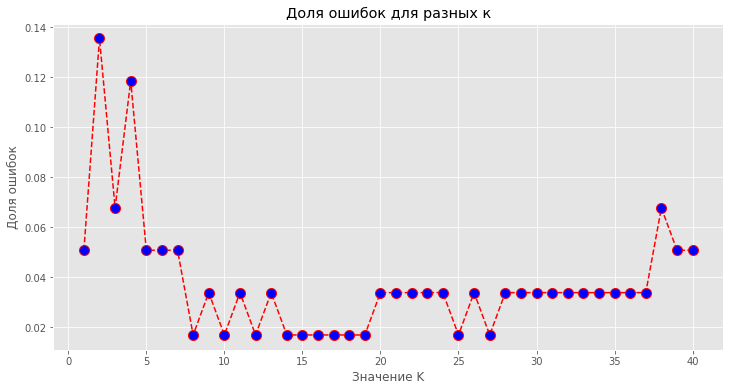

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 41), error_rate, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.title(u'Доля ошибок для разных к')  
plt.xlabel(u'Значение K')  
plt.ylabel(u'Доля ошибок')  


###  Заголовок
#### Заголовок 2


это комментарий  <br>  текст